# Analyzing Crime in LA

## 🌇🚔 Background

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highely populated city, it isn't always glamarous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing their crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

You are free to use any methodologies that you like in order to produce your insights. 

# The Data

They have provided you with a single dataset to use. A summary and preview is provided below.

The data is publicly available [here](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8).

## 👮‍♀️ crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24 hour military time. |
| `'AREA'` | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Rpt Dist No'` | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74ab |
| `'Crm Cd'` | Crime code for the offence committed. |
| `'Crm Cd Desc'` | Definition of the crime. |
| `'Vict Age'` | Victim Age (years) |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Premis Cd'` | Code for the type of structure, vehicle, or location where the crime took place. |
| `'Premis Desc'` | Definition of the `'Premis Cd'`. |
| `'Weapon Used Cd'` | The type of weapon used in the crime. |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'Crm Cd 1'` | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. |
| `'Crm Cd 2'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 3'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 4'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'LOCATION'` | Street address of the crime. |
| `'Cross Street'` | Cross Street of rounded Address |
| `'LAT'` | Latitude of the crime location. |
| `'LON'` | Longtitude of the crime location. |

In [17]:
import pandas as pd
crimes = pd.read_csv("data/crimes.csv")
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201223780,2020-11-02,11/02/2020 12:00:00 AM,1120,12,77th Street,1256,210,ROBBERY,65,F,H,102.0,SIDEWALK,204.0,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,06/23/2020 12:00:00 AM,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,M,O,210.0,RESTAURANT/FAST FOOD,NaN,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,02/28/2020 12:00:00 AM,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,F,W,108.0,PARKING LOT,NaN,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,07/26/2022 12:00:00 AM,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,11/27/2020 12:00:00 AM,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


## 💪 The Challenge

* Use your skills to produce insights about crimes in Los Angeles.
* Examples could include examining how crime varies by area, crime type, victim age, time of day, and victim descent.
* You could build machine learning models to predict criminal activities, such as when a crime may occur, what type of crime, or where, based on features in the dataset.
* You may also wish to visualize the distribution of crimes on a map.

### Note:

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## ✍️ Judging criteria

This competition is for helping to understand how competitions work. This competition will not be judged.

## ✅ Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck! 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency

# Data Exploration

In [19]:
crime_df = pd.read_csv("data/crimes.csv")
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201223780,2020-11-02,11/02/2020 12:00:00 AM,1120,12,77th Street,1256,210,ROBBERY,65,F,H,102.0,SIDEWALK,204.0,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,06/23/2020 12:00:00 AM,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,M,O,210.0,RESTAURANT/FAST FOOD,NaN,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,02/28/2020 12:00:00 AM,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,F,W,108.0,PARKING LOT,NaN,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,07/26/2022 12:00:00 AM,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,11/27/2020 12:00:00 AM,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


In [20]:
crime_df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
400141,201115779,2020-11-16,11/11/2020 12:00:00 AM,1200,11,Northeast,1138,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,101.0,STREET,NaN,NaN,Invest Cont,420.0,NaN,NaN,NaN,6100 MOUNT ANGELUS DR,NaN,34.1152,-118.1898
400142,222013649,2022-06-24,06/23/2022 12:00:00 AM,1900,20,Olympic,2039,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",27,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,Invest Cont,740.0,NaN,NaN,NaN,700 S WESTMORELAND AV,NaN,34.0598,-118.2891
400143,221817476,2022-09-16,09/16/2022 12:00:00 AM,630,18,Southeast,1801,220,ATTEMPTED ROBBERY,37,M,H,101.0,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,220.0,998.0,NaN,NaN,88TH ST,BARING CROSS,33.9580,-118.2894
400144,201510806,2020-05-27,05/22/2020 12:00:00 AM,1600,15,N Hollywood,1519,903,CONTEMPT OF COURT,34,F,A,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Adult Other,903.0,NaN,NaN,NaN,6700 RIVERTON AV,NaN,34.1922,-118.3660
400145,201214091,2020-06-04,06/03/2020 12:00:00 AM,130,12,77th Street,1248,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,Invest Cont,510.0,NaN,NaN,NaN,HOOVER,GAGE,33.9819,-118.2870


In [21]:
crime_df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,4.001460e+05,400146.000000,400146.000000,400146.000000,400146.000000,400146.000000,400140.000000,136027.000000,400140.000000,28121.000000,798.000000,0.0,400146.000000,400146.000000
mean,2.148029e+08,1337.737546,10.713237,1117.730313,493.345734,30.134356,301.463583,360.739155,493.152017,960.451940,981.646617,NaN,33.969534,-117.992468
std,1.028657e+07,653.026638,6.092243,609.227877,200.734431,21.856693,216.049272,126.150296,200.565711,112.465015,56.556945,NaN,1.883360,6.531314
min,2.113000e+03,1.000000,1.000000,101.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,626.000000,NaN,0.000000,-118.667600
25%,2.021122e+08,900.000000,6.000000,622.000000,330.000000,4.000000,101.000000,307.000000,330.000000,998.000000,998.000000,NaN,34.014000,-118.429400
50%,2.119114e+08,1420.000000,11.000000,1141.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,NaN,34.058500,-118.321300
75%,2.215050e+08,1900.000000,16.000000,1617.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,NaN,34.163000,-118.273900
max,2.399165e+08,2359.000000,21.000000,2198.000000,954.000000,120.000000,972.000000,516.000000,954.000000,999.000000,999.000000,NaN,34.334300,0.000000


In [22]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400146 entries, 0 to 400145
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           400146 non-null  int64  
 1   Date Rptd       400146 non-null  object 
 2   DATE OCC        400146 non-null  object 
 3   TIME OCC        400146 non-null  int64  
 4   AREA            400146 non-null  int64  
 5   AREA NAME       400146 non-null  object 
 6   Rpt Dist No     400146 non-null  int64  
 7   Crm Cd          400146 non-null  int64  
 8   Crm Cd Desc     400146 non-null  object 
 9   Vict Age        400146 non-null  int64  
 10  Vict Sex        346271 non-null  object 
 11  Vict Descent    346268 non-null  object 
 12  Premis Cd       400140 non-null  float64
 13  Premis Desc     399910 non-null  object 
 14  Weapon Used Cd  136027 non-null  float64
 15  Weapon Desc     136027 non-null  object 
 16  Status Desc     400146 non-null  object 
 17  Crm Cd 1  

In [23]:
crime_df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex           53875
Vict Descent       53878
Premis Cd              6
Premis Desc          236
Weapon Used Cd    264119
Weapon Desc       264119
Status Desc            0
Crm Cd 1               6
Crm Cd 2          372025
Crm Cd 3          399348
Crm Cd 4          400146
LOCATION               0
Cross Street      335564
LAT                    0
LON                    0
dtype: int64

# Data Visualization

## Explore Crime Type Distribution ('Crm Cd Desc'):

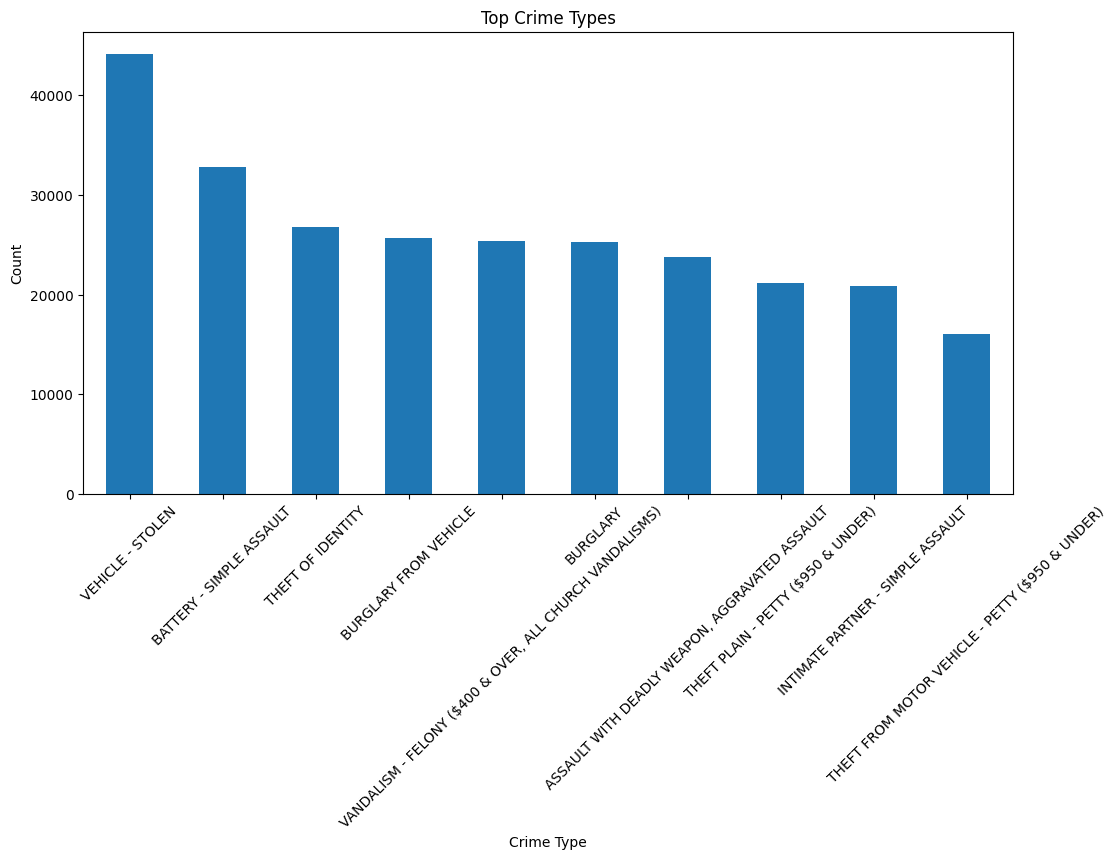

In [24]:
top_10_crimes = crime_df['Crm Cd Desc'].value_counts(). head(10)

plt.figure(figsize=(12,6))
top_10_crimes.plot(kind='bar')
plt.title('Top Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
print(top_10_crimes)

VEHICLE - STOLEN                                           44159
BATTERY - SIMPLE ASSAULT                                   32817
THEFT OF IDENTITY                                          26777
BURGLARY FROM VEHICLE                                      25725
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    25353
BURGLARY                                                   25241
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             23740
THEFT PLAIN - PETTY ($950 & UNDER)                         21171
INTIMATE PARTNER - SIMPLE ASSAULT                          20825
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            16103
Name: Crm Cd Desc, dtype: int64


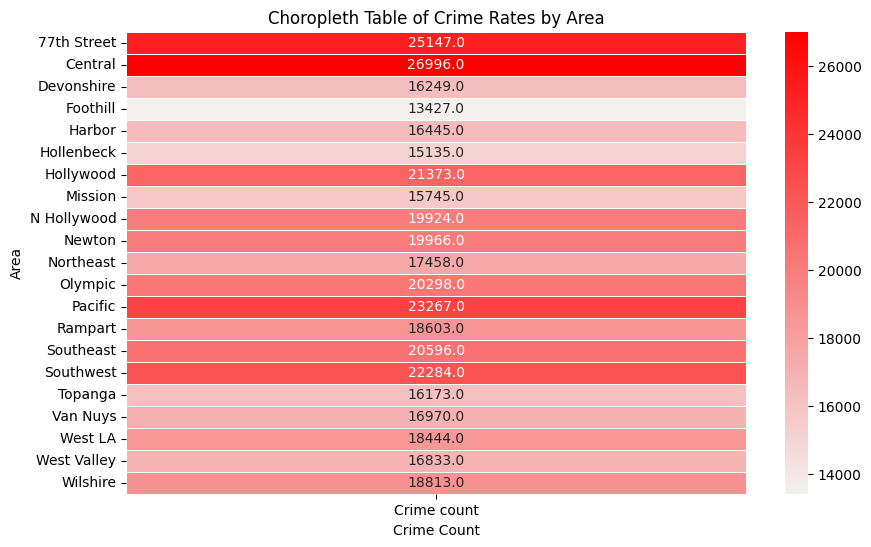

In [26]:
# Sort the DataFrame by 'Crime Rate' to highlight high-crime areas
crime_counts = crime_df['AREA NAME'].value_counts().reset_index()
crime_counts.columns = ['Area', 'Crime count']
crime_counts = crime_counts.sort_values(by='Crime count', ascending=False)
# Create a color palette for shading the table cells
cmap = sns.light_palette("red", as_cmap=True)

# Create a pivot table to reshape the data for visualization
pivot_table = crime_counts.pivot_table(index='Area', values='Crime count')

# Plot the table with color-coding
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(pivot_table, cmap=cmap, annot=True, fmt=".1f", linewidths=0.5)

# Customize the plot appearance
plt.title("Choropleth Table of Crime Rates by Area")
plt.xlabel("Crime Count")
plt.ylabel("Area")

# Show the plot
plt.show()

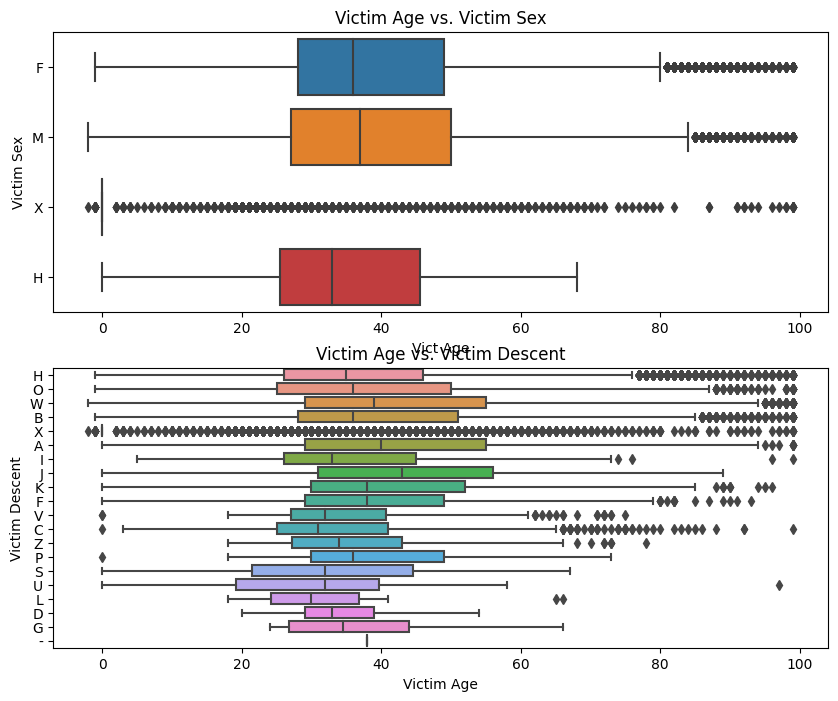

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.boxplot(data=crime_df, x='Vict Age', y='Vict Sex', ax=axes[0])
axes[0].set_title("Victim Age vs. Victim Sex")
axes[0].set_ylabel("Victim Sex")

sns.boxplot(data=crime_df, x='Vict Age', y='Vict Descent', ax=axes[1])
axes[1].set_title("Victim Age vs. Victim Descent")
axes[1].set_xlabel("Victim Age")
axes[1].set_ylabel("Victim Descent")

plt.show()

# Spatial Analysis

## Crime Hotspot

In [28]:
# crime density in different areas
crime_area = crime_df.groupby(['LAT', 'LON']).size().reset_index(name='Crime Count')
top_weapon = crime_df['Weapon Desc'].value_counts().idxmax()
top_crime_desc = crime_df['Crm Cd Desc'].value_counts().idxmax()

fig_area = px.density_mapbox(
    crime_area, lat='LAT', lon='LON', z='Crime Count',
    radius=10, center=dict(lat=34.0522, lon=-118.2437),
    zoom=9, mapbox_style="carto-positron",
    title='Interactive Heatmap of Crime Density in LA',
    hover_name='Crime Count',
    hover_data=['LAT', 'LON']
)

fig_area.update_traces(
    hovertemplate='<br>'.join([
        'Crime Count: %{hovertext}',
        f'Top Weapon: {top_weapon}',
        f'Top Crime Desc: {top_crime_desc}'
    ])
)
fig_area.update_layout(margin={"r":0, "t":30, "l":0, "b":0})
fig_area.show()

## Type of crime vs Location

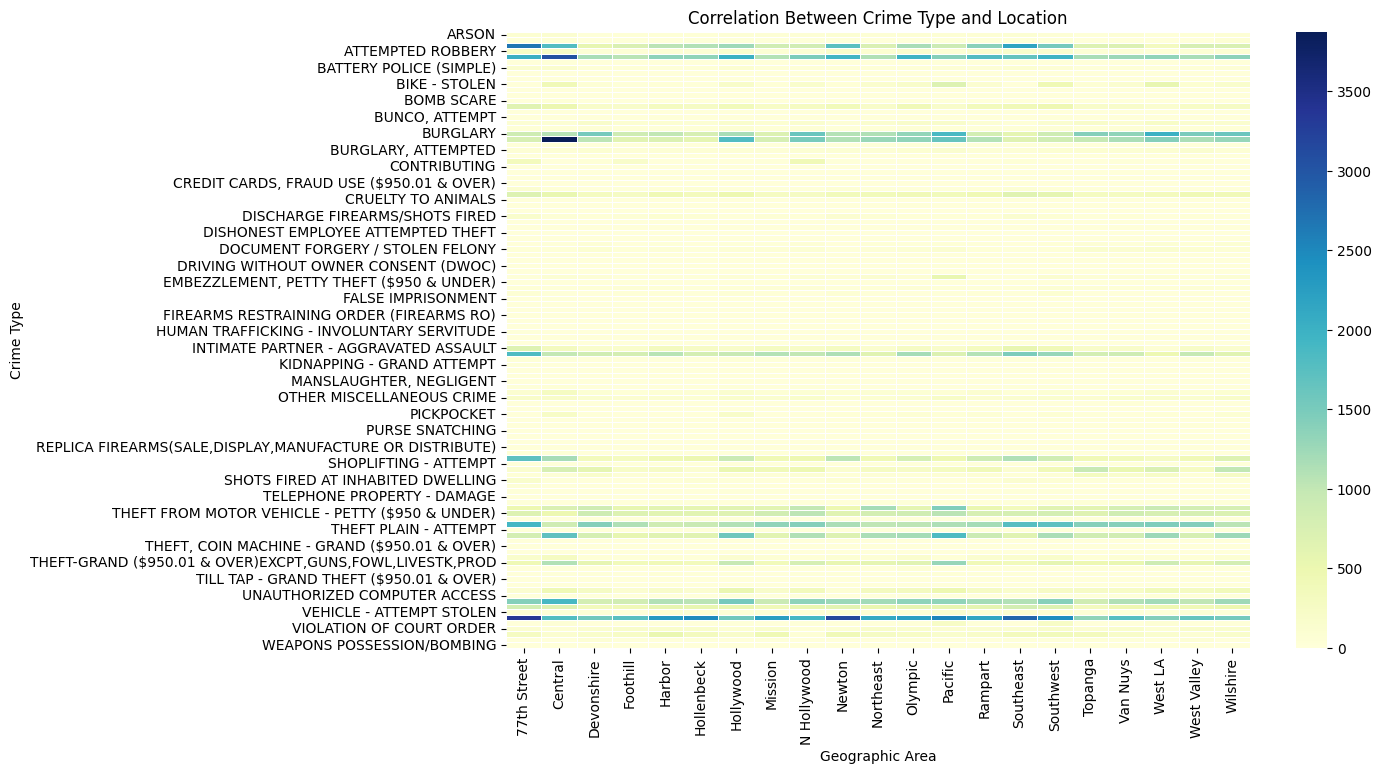

In [29]:
crime_area_cross = pd.crosstab(crime_df['Crm Cd Desc'], crime_df['AREA NAME'])

plt.figure(figsize=(12,8))
sns.heatmap(crime_area_cross, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Between Crime Type and Location')
plt.xlabel('Geographic Area')
plt.ylabel('Crime Type')
plt.xticks(rotation=90)

plt.show()

Areas with high rates of crimes: 77th Street, Central, Hollywood, Newton, Pacific, Rampart, Southest, Southwest
Vehicle - Attempt Stolen is almost the crime with highest rate in every area, then attempted robbery, and Bike Stolen
Foothill seems to be the safest area


In [30]:
crime_code = crime_df.groupby('AREA NAME')['Crm Cd 1'].sum().sort_values(ascending=False).reset_index()
crime_code


,AREA NAME,Crm Cd 1
0,Central,12930480.0
1,77th Street,12265790.0
2,Pacific,11257569.0
3,Southwest,11230853.0
4,Hollywood,10557993.0
5,Southeast,10130191.0
6,Olympic,10113390.0
7,N Hollywood,9801563.0
8,Newton,9725721.0
9,Wilshire,9196494.0


## Crime Descriptions

In [16]:
crime_desc = ' '.join(crime_df['Crm Cd Desc'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(crime_desc)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Crime Descriptions')
plt.show()

NameError: name 'WordCloud' is not defined

## Most Common Weapons used in Crimes

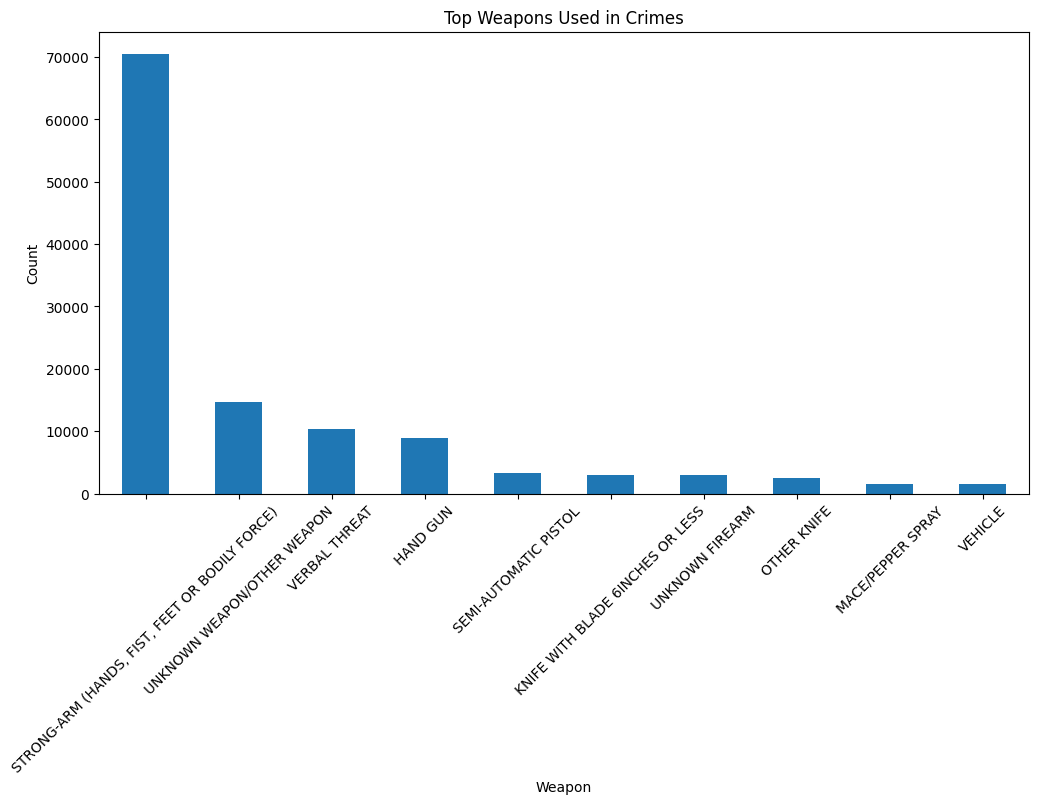

In [17]:
plt.figure(figsize=(12, 6))
top_weapons = crime_df['Weapon Desc'].value_counts().head(10)
top_weapons.plot(kind='bar')
plt.title('Top Weapons Used in Crimes')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# _What factors affect crimal rates in such areas?_

# Time Analysis

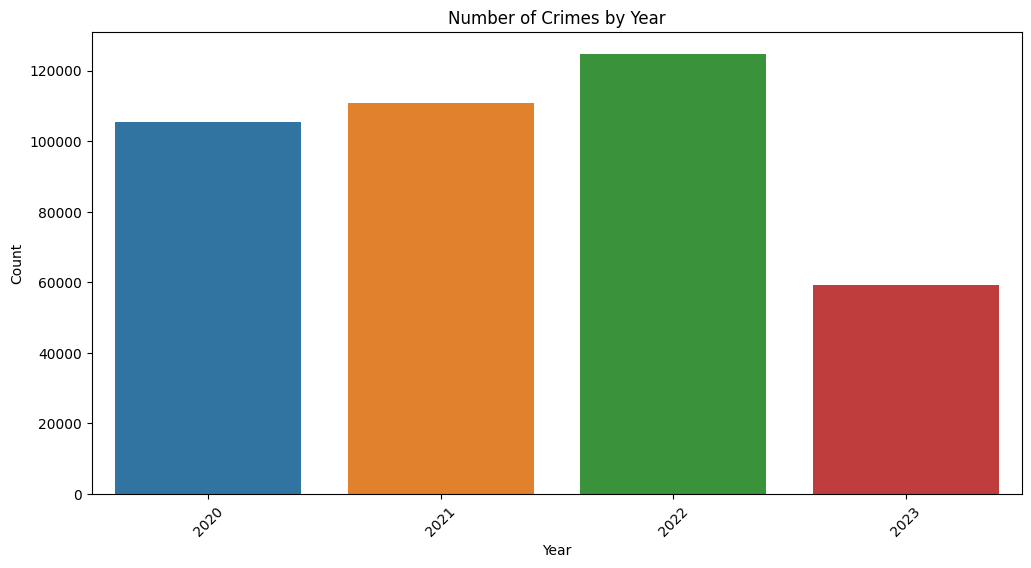

In [20]:
# By year
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])
crime_df['Year'] = crime_df['DATE OCC'].dt.year
crime_df['Month'] = crime_df['DATE OCC'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(data=crime_df, x='Year')
plt.title('Number of Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

2022 has the higest crime counts. Since 2023 is not over yet, we're not sure the true number of crimes for 2023

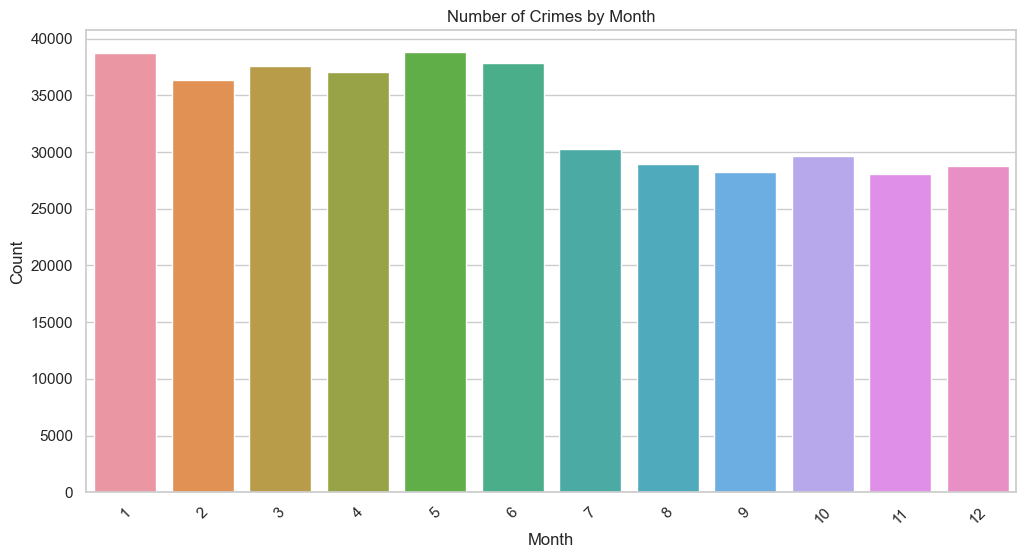

In [26]:
# months
plt.figure(figsize=(12,6))
sns.countplot(data=crime_df, x='Month')
plt.title('Number of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Crime rates tend to be higher during the first 6 months of the year!

In [31]:
# By season
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

crime_df['Season'] = crime_df['Month'].apply(categorize_season)

seasonal_stat = crime_df.groupby('Season').agg(
    total_crime = ('Season', 'count'),
    day_in_season = ('DATE OCC', 'nunique')
).reset_index()

seasonal_stat['Crime Rate'] = seasonal_stat['total_crime']/seasonal_stat['day_in_season']

season_colors = {
    'Winter': '#a3c1ad',
    'Spring': '#f5bb00',
    'Summer': '#f2b632',
    'Fall': '#f28d35',
}

fig_season = px.bar(
    seasonal_stat,
    x='Season',
    y='Crime Rate',
    title='Crime Rates by Season',
    labels={'Crime Rate': 'Daily Crime Rate'},
    color='Season',
    color_discrete_map=season_colors
)
fig_season.show()

The daily crime rate is highest during the fall season, followed by winter, summer, and spring. These differences in crime rates across seasons may be influenced by various factors such as weather conditions, holidays, and social dynamics.

## Victim Demographic Analysis

In [21]:
vict_demo_vars = ['Vict Age', 'Vict Sex', 'Vict Descent']

for i in vict_demo_vars:
    contigency_table = pd.crosstab(crime_df[i], crime_df['Crm Cd Desc'])
    chi2, p, _, _ = chi2_contingency(contigency_table)
    print(f'Chi-square Test for {i} vs. Crime Type:')
    print(f'Chi-square Stats: {chi2}')
    print(f'p-value: {p}')
    print('-----------------------------------------')

Chi-square Test for Vict Age vs. Crime Type:
Chi-square Stats: 277125.3068045626
p-value: 0.0
-----------------------------------------
Chi-square Test for Vict Sex vs. Crime Type:
Chi-square Stats: 92862.33794037909
p-value: 0.0
-----------------------------------------
Chi-square Test for Vict Descent vs. Crime Type:
Chi-square Stats: 118264.67246141238
p-value: 0.0
-----------------------------------------


_victim demographics are not independent of the type of crime they experience. There are clear associations between age, sex, descent, and crime type._

In [41]:
for i in vict_demo_vars:
    # Group by the chosen variable and crime description, calculate counts
    vict_subset = crime_df.groupby([i, 'Crm Cd Desc']).size().reset_index(name='Count')
    
    # Sort by 'Count' in descending order and get the top 5 records
    top_crime_vict = vict_subset.sort_values(by='Count', ascending=False).head(5).reset_index()
    
    # Create the grouped bar chart
    fig_vict = px.bar(top_crime_vict, x=i, y='Count', color='Crm Cd Desc', 
                      title=f'Top 5 Crime Types by {i}', labels={i: i, 'Count': 'Count', 'Crm Cd Desc': 'Crime Type'})
    fig_vict.update_xaxes(categoryorder='total ascending')

    fig_vict.show()


#### Age Group

In [17]:
age_range = [0, 17, 35, 60, float('inf')]
age_label = ['Minors', 'Young Adults', 'Adults', 'Seniors']

crime_df['Age Group'] = pd.cut(crime_df['Vict Age'], bins=age_range, labels=age_label)

In [18]:
age_crime = crime_df.groupby(['Age Group', 'Crm Cd Desc']).size().reset_index(name='Count')
age_crime_fig = px.bar(age_crime, x='Age Group', y='Count', color='Crm Cd Desc', title='Crime Types by Age Group', labels={'Age Group': 'Age Group', 'Count': 'Count', 'Crm Cd Desc': 'Crime Type'}, barmode='relative')
age_crime_fig.show()

In [19]:
cont = pd.crosstab(crime_df['Age Group'], crime_df['Crm Cd Desc'])
chi, p, _, _ = chi2_contingency(cont)
if p < 0.05:  # You can choose your significance level (alpha)
    print("There is a significant relationship between age group and crime type.")
else:
    print("There is no significant relationship between age group and crime type.")

There is a significant relationship between age group and crime type.


Based on the analysis of crime data grouped by age, we can draw several key observations:

**Age Groups and Total Crime Counts:**

The age group "Young Adults" (comprising individuals aged 18-35) has the highest total count of reported crimes. This suggests that this demographic group experiences a higher prevalence of criminal incidents in the city.
Following "Young Adults," the age group "Adults" (individuals aged 36-60) reports the second-highest total count of crimes.
Conversely, the age group "Minors" (individuals aged 0-17) has the lowest total count of reported crimes. This implies that minors, being individuals below the legal adult age, are less frequently involved in criminal incidents.

**Common Crime Types for Young Adults:**

For the "Young Adults" age group, the most frequently reported crime types are "Burglary from Vehicle," "Battery - Simple Assault," and "Theft of Identity." These crime types seem to disproportionately affect young adults.
This observation may indicate that crimes like vehicle burglary, battery, and identity theft might be connected to factors or environments that are more prevalent among young adults, such as urban living, nightlife, or digital activities.

**Common Crime Types for Adults:**

Among "Adults," the most commonly reported crime types are "Battery - Simple Assault," "Theft of Identity," and "Burglary from Vehicle." It's noteworthy that these crime types align closely with those reported by "Young Adults."
This similarity in the prevalent crime types between "Young Adults" and "Adults" suggests that certain crimes are not age-exclusive and affect multiple age groups.
In summary, the analysis indicates that "Young Adults" face a relatively higher risk of being victims of crimes compared to other age groups. The most reported crimes for both "Young Adults" and "Adults" are battery-related incidents and identity theft, which may warrant specific attention and preventive measures for these age groups. Understanding the underlying factors contributing to the prevalence of these crimes among different age groups can assist law enforcement agencies and policymakers in devising targeted strategies to enhance safety and reduce criminal incidents.

#### Gender-Based Victimization Analysis

In [21]:
gender_count = crime_df['Vict Sex'].value_counts()
total_victim = len(crime_df)
gender_percent = gender_count/total_victim * 100

gender_pie = px.pie(values=gender_percent, names=gender_percent.index, title='Gender Distribution of Victims')
gender_pie.show()

In [22]:
gender_crime = crime_df.groupby(['Vict Sex', 'Crm Cd Desc']).size().unstack()

gender_crime_fig = px.bar(
    gender_crime,
    barmode='stack',
    title='Crime Types by Gender',
    labels={'index': 'Gender', 'value': 'Count', 'Crm Cd Desc': 'Crime Type'}
)
gender_crime_fig.show()

several key observations can be made:

**Gender Distribution:**

The dataset predominantly consists of male victims, with male victims accounting for the highest count of reported crimes. This may suggest that males are more frequently targeted or report crimes more often than females.

**Crime Types for Males:** 

Among male victims, the most common crime type is "Battery - Simple Assault." This suggests that simple assaults are a prevalent crime affecting males. Additionally, "Assault with Deadly Weapon," "Burglary from Vehicle," and "Burglary" are also significant crime types. These crimes may indicate a range of criminal activities, from non-violent property crimes to more serious offenses.

**Crime Types for Females:**

In contrast, female victims most commonly experience "Intimate Partner - Simple Assault" and "Theft of Identity." These findings could indicate that crimes against females often involve domestic violence or identity-related crimes. "Battery - Simple Assault" and "Burglary from Vehicle" are also notable crime types affecting females, although their order of prevalence differs from males.

In summary, the analysis highlights disparities in crime types between genders. Males frequently experience physical assaults and property-related crimes, while females are more commonly affected by intimate partner violence and identity-related offenses. These insights can help law enforcement and policymakers tailor resources and preventive measures to address the specific needs and challenges faced by different gender groups.

#### Ethnicity-Based Analysis

In [33]:
ethnic_count = crime_df['Vict Descent'].value_counts().reset_index()
ethnic_count.columns = ['Ethnicity', 'Count']

ethnic_count_fig = px.pie(ethnic_count, names='Ethnicity', values='Count', title='Distribution of Victims by Ethnicity')
ethnic_count_fig.show()

In [38]:
top_ethnicities = ethnic_count.head(3)['Ethnicity']
crime_by_ethnicity_top = crime_df[crime_df['Vict Descent'].isin(top_ethnicities)]

# Create a DataFrame with the structure for the chart
grouped_bar_data = crime_by_ethnicity_top.groupby(['Vict Descent', 'Crm Cd Desc']).size().reset_index(name='Count')

fig_grouped_bar = px.bar(
    grouped_bar_data,
    x='Vict Descent',
    y='Count',
    color='Crm Cd Desc',
    title=f'Top {3} Ethnicities - Crime Types Distribution',
    labels={'Vict Descent': 'Ethnicity', 'Count': 'Count', 'Crm Cd Desc': 'Crime Type'},
    category_orders={'Crm Cd Desc': crime_df['Crm Cd Desc'].value_counts().index},
    width=800,
    height=600
)
fig_grouped_bar.show()



In the analysis of crime victimization by ethnic descent, we find that the top three ethnicities most affected by crime are White, Hispanic/Latin/Mexican, and Black. Each of these groups experiences different patterns of criminal victimization:

**Hispanic/Latin/Mexican Ethnicity:**

Top Crimes: The most common crimes experienced by individuals of Hispanic/Latin/Mexican descent are "Battery - Simple Assault," "Assault with Deadly Weapon," "Intimate Partner - Simple Assault," and "Theft of Identity."
Analysis: Individuals in this group are most vulnerable to personal and property crimes. The prevalence of simple assault and intimate partner assault suggests that interpersonal conflicts and domestic violence may be significant concerns within this community. Additionally, identity theft is a notable concern, indicating potential financial and personal security risks.

**White Ethnicity:**

Top Crimes: The primary crimes affecting individuals of White descent include "Burglary," "Burglary from Vehicle," "Theft of Identity," and "Theft - Plain."
Analysis: This group appears to face property-related crimes such as burglary and theft, which may indicate a higher risk of home and property invasions. Identity theft is also prominent, highlighting the need for improved cybersecurity and financial security measures.

**Black Ethnicity:**

Top Crimes: The leading crimes impacting individuals of Black descent include "Theft of Identity," "Assault with Deadly Weapon," "Battery - Simple Assault," and "Intimate Partner."
Analysis: Victims of Black descent are most affected by violent crimes, including assault with deadly weapons and simple assault. Identity theft is another concern, emphasizing the need for community education on identity protection.

**Overall Analysis:**
This analysis reveals distinct patterns in crime victimization across these three major ethnicities. Hispanic/Latin/Mexican individuals tend to experience more personal and domestic violence-related crimes, while White individuals are susceptible to property-related offenses. Black individuals are disproportionately affected by violent crimes. These insights can be valuable for law enforcement, policymakers, and community organizations in tailoring crime prevention and support efforts to the specific needs of these ethnic communities. Additionally, addressing issues related to identity theft appears to be a common concern across all three ethnicities and should be a focus for preventive measures.